In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Train Data

In [2]:
train_data = pd.read_excel(r'C:\Users\dell\Python\stage 2\train.xlsx')
train_data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0
1,2,209,Feed,clay,1,0,0.0,0,2,1
2,3,257,Feed,clay,1,0,0.0,0,2,1
3,4,257,Feed,silt,1,0,0.0,0,2,1
4,5,342,Feed,clay,1,0,0.0,0,2,1


In [3]:
train_data.shape

(80000, 10)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  int64  
 1   Insects                     80000 non-null  int64  
 2   Crop                        80000 non-null  object 
 3   Soil                        80000 non-null  object 
 4   Category_of_Toxicant        80000 non-null  int64  
 5   Does_count                  80000 non-null  int64  
 6   Number_of_Weeks_Used        71945 non-null  float64
 7   Number_Weeks_does_not used  80000 non-null  int64  
 8   Season                      80000 non-null  int64  
 9   Crop_status                 80000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ MB


In [5]:
train_data.nunique()

ID                            80000
Insects                          71
Crop                              2
Soil                              2
Category_of_Toxicant              3
Does_count                       20
Number_of_Weeks_Used             64
Number_Weeks_does_not used       51
Season                            3
Crop_status                       3
dtype: int64

In [6]:
train_data.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,80000.0,40000.500000,23094.155105,1.0,800.99,4000.95,8000.9,20000.75,40000.5,60000.25,72000.1,76000.05,76800.04,77600.03,78400.02,79200.01,80000.0
Insects,80000.0,1400.020875,849.792471,150.0,188.00,342.00,448.0,731.00,1212.0,1898.00,2688.0,2999.00,3165.00,3337.00,3516.00,3702.00,4097.0
Category_of_Toxicant,80000.0,2.267587,0.463748,1.0,2.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,3.00,3.00,3.00,3.0
Does_count,80000.0,25.846750,15.557246,0.0,5.00,5.00,10.0,15.00,20.0,40.00,50.0,60.00,60.00,60.00,60.00,70.00,95.0
Number_of_Weeks_Used,71945.0,28.664480,12.424751,0.0,5.00,10.00,13.0,20.00,28.0,37.00,46.0,50.00,51.00,53.00,55.00,58.00,67.0
Number_Weeks_does_not used,80000.0,9.549088,9.905547,0.0,0.00,0.00,0.0,0.00,7.0,16.00,24.0,29.00,30.00,32.00,34.00,37.00,50.0
Season,80000.0,1.897575,0.702079,1.0,1.00,1.00,1.0,1.00,2.0,2.00,3.0,3.00,3.00,3.00,3.00,3.00,3.0
Crop_status,80000.0,0.192312,0.455912,0.0,0.00,0.00,0.0,0.00,0.0,0.00,1.0,1.00,1.00,1.00,2.00,2.00,2.0


In [7]:
train_data.isnull().sum()

ID                               0
Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64

In [8]:
# Checking if missing values have somthing in common and the basic reason for these much missing values.
missing= train_data[train_data['Number_of_Weeks_Used'].isnull()]
missing

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
5,6,448,Food,silt,1,0,NaN,0,2,1
6,7,448,Food,silt,1,0,NaN,0,2,1
10,11,1212,Feed,clay,1,0,NaN,0,3,0
17,18,2401,Food,silt,1,0,NaN,0,1,1
35,36,257,Food,clay,3,30,NaN,0,2,0
...,...,...,...,...,...,...,...,...,...,...
79925,79926,2688,Food,clay,2,20,NaN,21,3,1
79928,79929,2688,Food,clay,2,20,NaN,10,1,1
79954,79955,2999,Food,clay,2,20,NaN,37,2,1
79962,79963,3165,Food,clay,2,30,NaN,4,1,0


In [9]:
missing.nunique()

ID                            8055
Insects                         71
Crop                             2
Soil                             2
Category_of_Toxicant             3
Does_count                      19
Number_of_Weeks_Used             0
Number_Weeks_does_not used      49
Season                           3
Crop_status                      3
dtype: int64

In [10]:
# Since there is no exact relation which could be seen for missing values so using mean/median , they both are same 28.

In [11]:
train_data['Number_of_Weeks_Used'] = train_data['Number_of_Weeks_Used'].fillna(28)

#### Test data

In [12]:
test_data = pd.read_excel(r'C:\Users\dell\Python\stage 2\test.xlsx')
test_data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1,188,Feed,silt,1,0,NaN,0,2
1,2,410,Feed,silt,1,0,0.0,0,2
2,3,626,Feed,clay,1,0,0.0,0,2
3,4,731,Feed,clay,1,0,0.0,0,2
4,5,789,Food,clay,1,0,0.0,0,1


In [14]:
test_data.shape

(35000, 9)

In [13]:
test_data.isnull().sum()

ID                               0
Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          3542
Number_Weeks_does_not used       0
Season                           0
dtype: int64

In [15]:
test_data.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,35000.0,17500.500000,10103.774047,1.0,350.99,1750.95,3500.9,8750.75,17500.5,26250.25,31500.1,33250.05,33600.04,33950.03,34300.02,34650.01,35000.0
Insects,35000.0,1394.015343,849.471207,150.0,188.00,342.00,448.0,731.00,1212.0,1898.00,2688.0,2999.00,3164.00,3337.00,3516.00,3702.00,4097.0
Category_of_Toxicant,35000.0,2.268514,0.465701,1.0,1.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,3.00,3.00,3.00,3.0
Does_count,35000.0,25.876429,15.535749,0.0,0.00,5.00,10.0,15.00,20.0,40.00,50.0,60.00,60.00,60.00,60.00,70.00,95.0
Number_of_Weeks_Used,31458.0,28.775701,12.438473,0.0,0.00,10.00,13.0,20.00,28.0,38.00,46.0,50.00,52.00,53.00,55.00,58.00,67.0
Number_Weeks_does_not used,35000.0,9.414886,9.820158,0.0,0.00,0.00,0.0,0.00,7.0,16.00,24.0,29.00,30.00,32.00,34.00,37.00,50.0
Season,35000.0,1.900200,0.701690,1.0,1.00,1.00,1.0,1.00,2.0,2.00,3.0,3.00,3.00,3.00,3.00,3.00,3.0


In [16]:
test_data['Number_of_Weeks_Used'] = test_data['Number_of_Weeks_Used'].fillna(28)

##### Univariate analysis

1    57333
0    22667
Name: Crop, dtype: int64


No handles with labels found to put in legend.


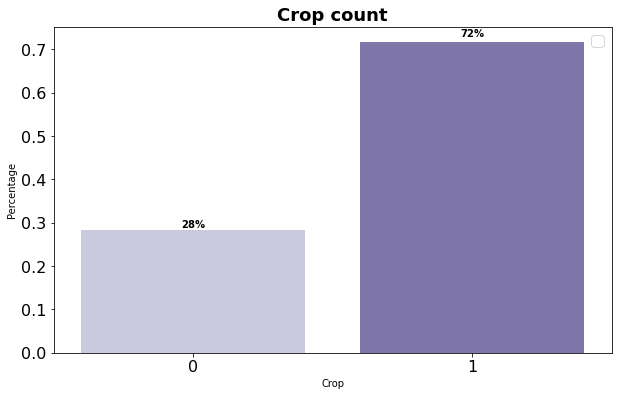

In [71]:
print(train_data['Crop'].value_counts())
plt.figure(figsize=(10,6))
eda_percentage = train_data['Crop'].value_counts(normalize = True).rename_axis('Crop').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Crop', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Crop count', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


0    43556
1    36444
Name: Soil, dtype: int64


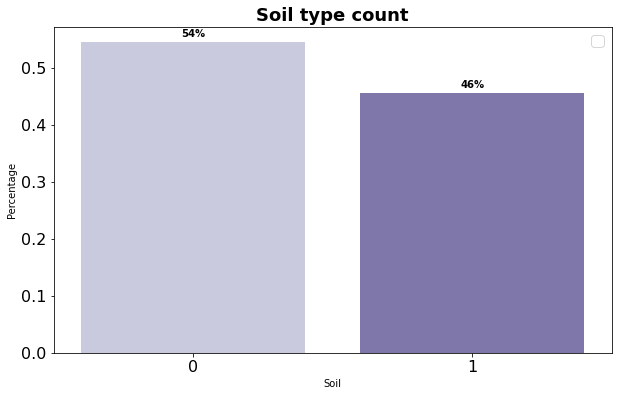

In [72]:
print(train_data['Soil'].value_counts())
plt.figure(figsize=(10,6))
eda_percentage = train_data['Soil'].value_counts(normalize = True).rename_axis('Soil').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Soil', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Soil type count', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


2    57067
3    22170
1      763
Name: Category_of_Toxicant, dtype: int64


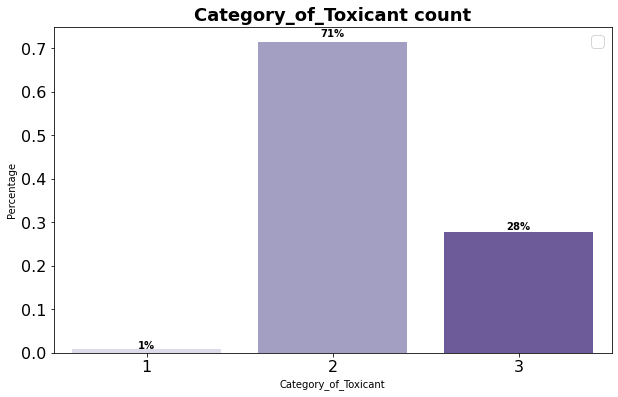

In [73]:
print(train_data['Category_of_Toxicant'].value_counts())
plt.figure(figsize=(10,6))
eda_percentage = train_data['Category_of_Toxicant'].value_counts(normalize = True).rename_axis('Category_of_Toxicant').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Category_of_Toxicant', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Category_of_Toxicant count', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


20    20344
40    11040
10    10881
30     9388
15     7405
5      4962
25     4396
60     3932
50     3056
35     1654
45      829
0       763
80      602
70      274
55      250
90       78
65       57
75       55
95       28
85        6
Name: Does_count, dtype: int64


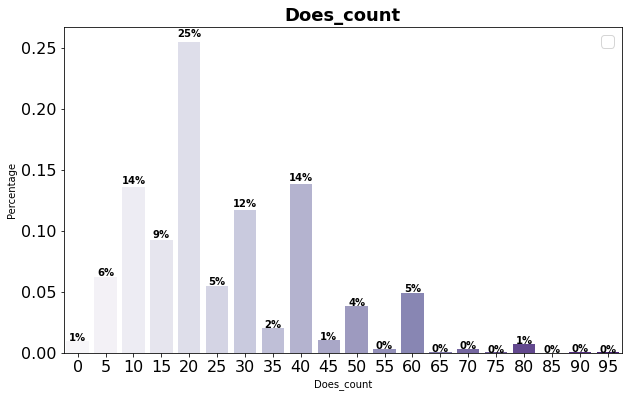

In [74]:
print(train_data['Does_count'].value_counts())
plt.figure(figsize=(10,6))
eda_percentage = train_data['Does_count'].value_counts(normalize = True).rename_axis('Does_count').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Does_count', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Does_count', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


2    39728
1    24233
3    16039
Name: Season, dtype: int64


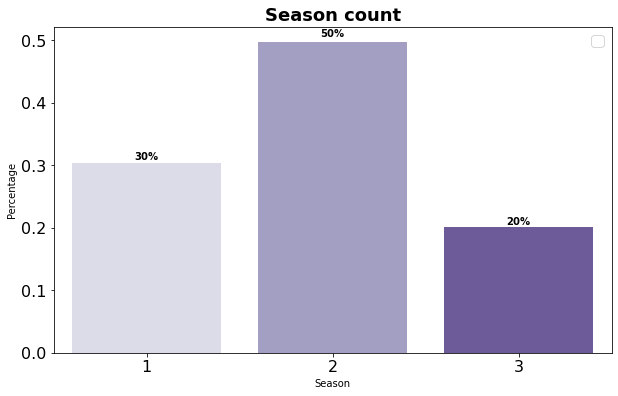

In [75]:
print(train_data['Season'].value_counts())
plt.figure(figsize=(10,6))
eda_percentage = train_data['Season'].value_counts(normalize = True).rename_axis('Season').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Season', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Season count', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

0    66716
1    11183
2     2101
Name: Crop_status, dtype: int64


No handles with labels found to put in legend.


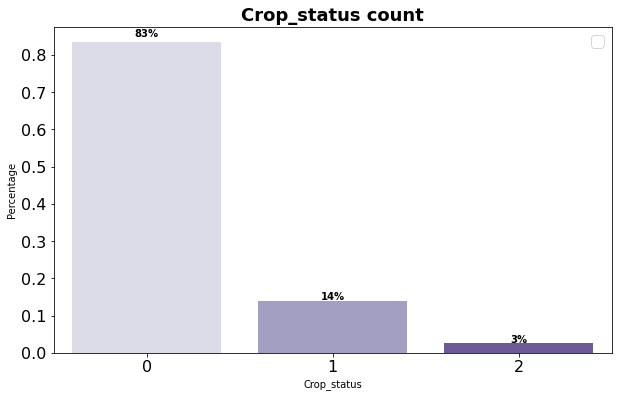

In [76]:
print(train_data['Crop_status'].value_counts())
plt.figure(figsize=(10,6))
eda_percentage = train_data['Crop_status'].value_counts(normalize = True).rename_axis('Crop_status').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Crop_status', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Crop_status count', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

##### Bivariate analysis

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


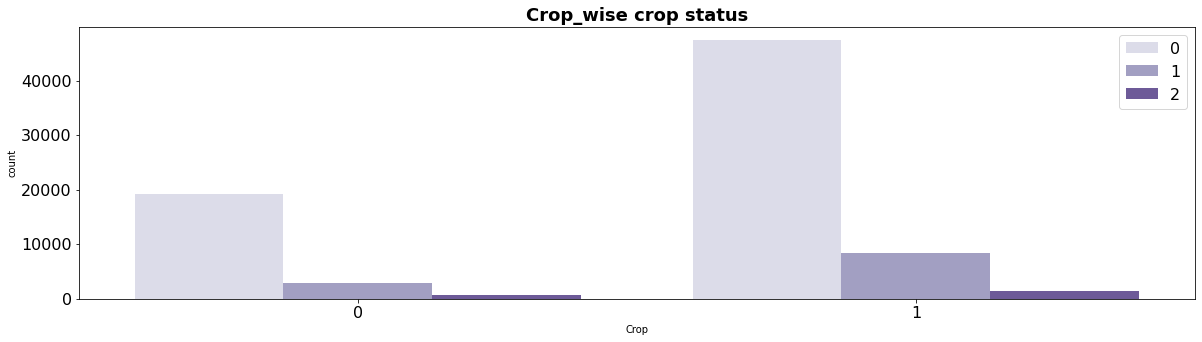

In [77]:
plt.figure(figsize=(20,5))
sns.countplot(train_data['Crop'], hue = train_data['Crop_status'], palette = 'Purples')
plt.title('Crop_wise crop status',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


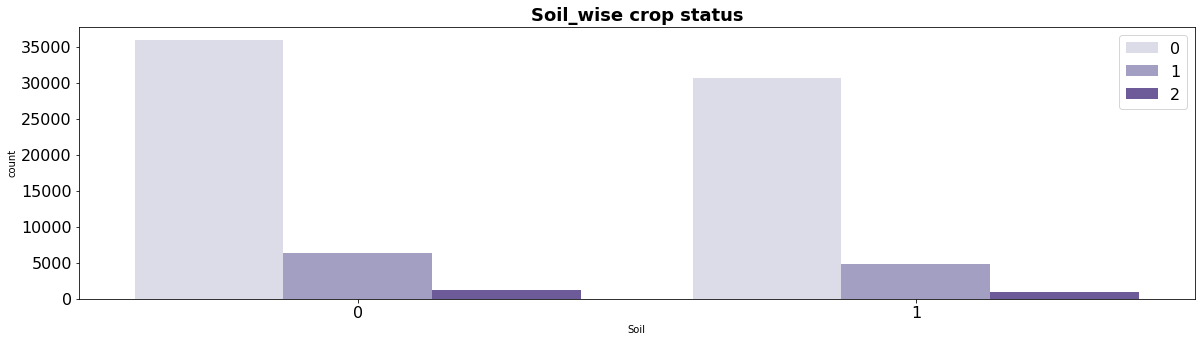

In [78]:
plt.figure(figsize=(20,5))
sns.countplot(train_data['Soil'], hue = train_data['Crop_status'], palette = 'Purples')
plt.title('Soil_wise crop status',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


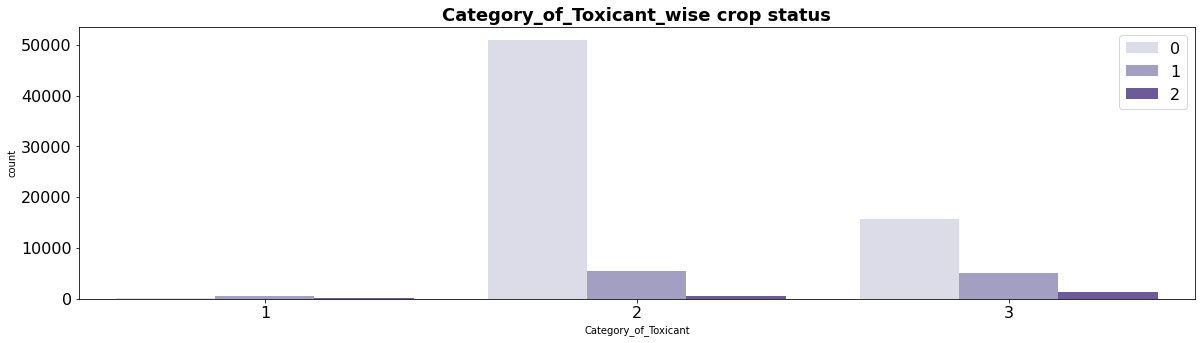

In [79]:
plt.figure(figsize=(20,5))
sns.countplot(train_data['Category_of_Toxicant'], hue = train_data['Crop_status'], palette = 'Purples')
plt.title('Category_of_Toxicant_wise crop status',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


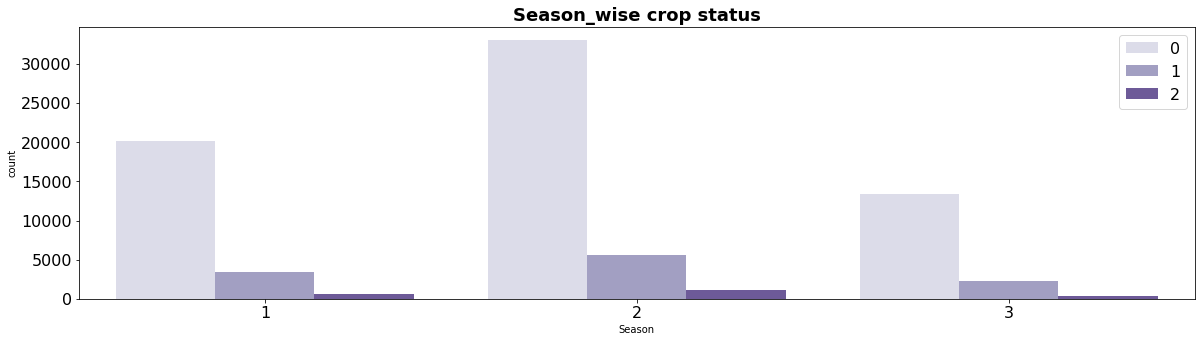

In [80]:
plt.figure(figsize=(20,5))
sns.countplot(train_data['Season'], hue = train_data['Crop_status'], palette = 'Purples')
plt.title('Season_wise crop status',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

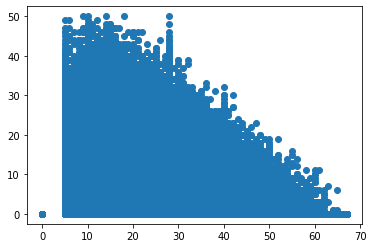

In [81]:
plt.scatter(train_data['Number_of_Weeks_Used'],train_data['Number_Weeks_does_not used'])

##### Correlation

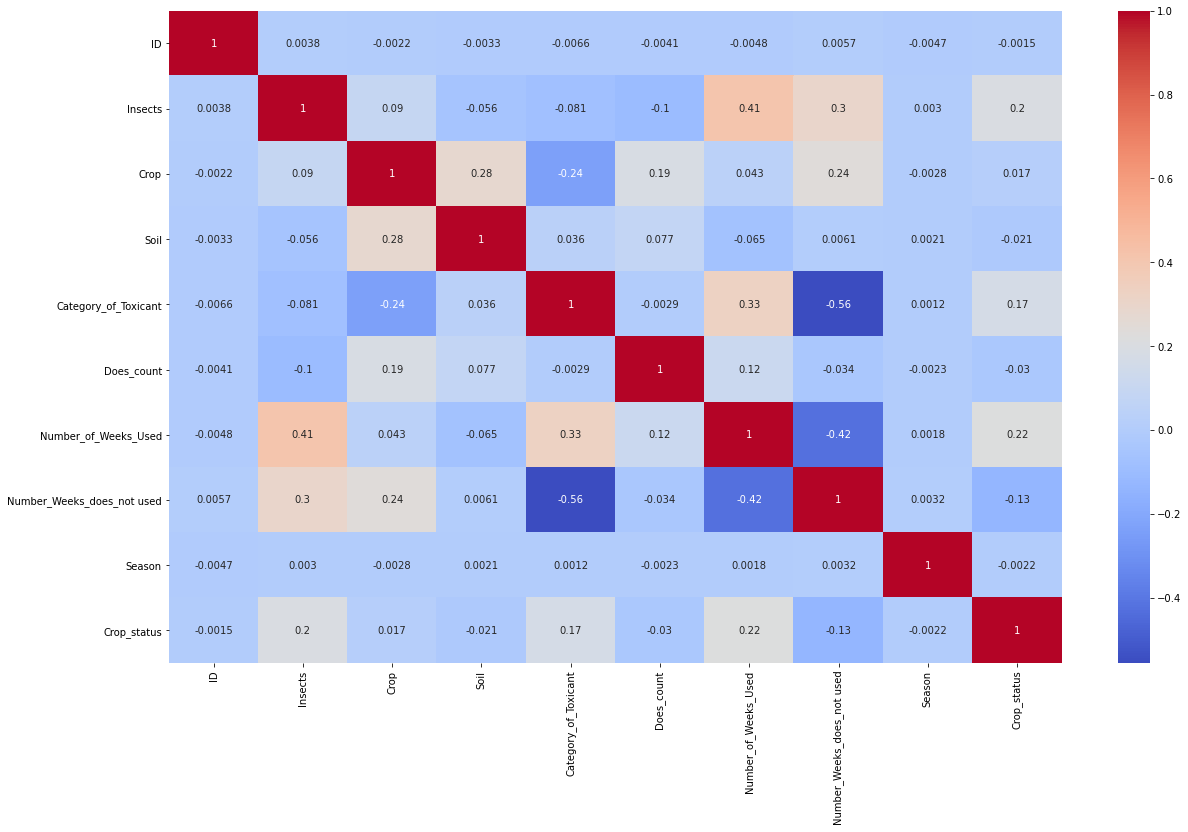

In [23]:
cr = train_data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cr,
            cmap='coolwarm',
            annot=True);

In [82]:
# No correlation can be seen between the variables, thus taking into consideration all the variables.

##### Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
cols = train_data[['Crop','Soil']]

In [21]:
# For train data
label_encoder = LabelEncoder()
for i in cols:
    label_encoder.fit(train_data[i])
    train_data[i] = label_encoder.transform(train_data[i])

In [22]:
# For test data
label_encoder = LabelEncoder()
for i in cols:
    label_encoder.fit(test_data[i])
    test_data[i] = label_encoder.transform(test_data[i])

#### Model Building

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import plot_roc_curve, auc

In [32]:
x = train_data.drop(columns = ['Crop_status','ID'])
y = train_data['Crop_status']

In [38]:
test_data_new=test_data.drop(columns=['ID'])

In [33]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.20,random_state=99)

### LOGISTIC REGRESSION

In [34]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("train accuracy in lr",lr.score(x_train,y_train))
print("test accuracy in lr",lr.score(x_val,y_val))

train accuracy in lr 0.832375
test accuracy in lr 0.8379375


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
pred_train_lr = lr.predict(x_train)
pred_val_lr = lr.predict(x_val)

In [36]:
print(metrics.classification_report(y_train,pred_train_lr))
print(metrics.classification_report(y_val,pred_val_lr))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     53297
           1       0.43      0.05      0.09      9013
           2       0.00      0.00      0.00      1690

    accuracy                           0.83     64000
   macro avg       0.42      0.35      0.33     64000
weighted avg       0.76      0.83      0.77     64000

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     13419
           1       0.43      0.05      0.09      2170
           2       0.00      0.00      0.00       411

    accuracy                           0.84     16000
   macro avg       0.43      0.35      0.34     16000
weighted avg       0.77      0.84      0.78     16000



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\

In [39]:
pred_test_lr = lr.predict(test_data_new)

In [41]:
lr_submission = pd.DataFrame(test_data['ID'],columns=["ID"])
lr_submission['Crop_status'] = pred_test_lr
lr_submission.set_index(test_data['ID'],inplace=True)
lr_submission.drop(columns=["ID"],inplace=True)

In [42]:
lr_submission.to_csv(r'C:\Users\dell\Python\stage 2\lr_submission.csv')

### DECISION TREE CLASSIFIER

In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("train accuracy in dt",dt.score(x_train,y_train))
print("test accuracy in dt",dt.score(x_val,y_val))

train accuracy in dt 0.983875
test accuracy in dt 0.7495625


In [44]:
dt2=DecisionTreeClassifier(random_state=99)
parameters={"criterion":["gini","entropy"],
           "max_depth":[2,3,4,5,6,7,8],
           "min_samples_split":[2,4,6,8],
           "min_samples_leaf":[3,4,5,6,7,8]}
gdt1=GridSearchCV(dt2,param_grid=parameters,cv=10,verbose=1,n_jobs=-1)
gdt1.fit(x_train,y_train)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=99),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=1)

In [45]:
gdt1.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [50]:
dt3=DecisionTreeClassifier(max_depth=gdt1.best_params_["max_depth"],criterion=gdt1.best_params_["criterion"],
                          min_samples_leaf=gdt1.best_params_["min_samples_leaf"],
                           min_samples_split=gdt1.best_params_["min_samples_split"])
dt3.fit(x_train,y_train)
print("Train accuracy :",dt3.score(x_train,y_train))
print("Test accuracy :",dt3.score(x_val,y_val))

Train accuracy : 0.841515625
Test accuracy : 0.8456875


In [51]:
pred_train_dt = dt3.predict(x_train)
pred_val_dt = dt3.predict(x_val)
pred_test_dt = dt3.predict(test_data_new)

In [52]:
print(metrics.classification_report(y_train,pred_train_dt))
print(metrics.classification_report(y_val,pred_val_dt))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     53297
           1       0.54      0.13      0.21      9013
           2       0.48      0.01      0.02      1690

    accuracy                           0.84     64000
   macro avg       0.63      0.38      0.38     64000
weighted avg       0.80      0.84      0.79     64000

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     13419
           1       0.53      0.13      0.22      2170
           2       0.40      0.00      0.01       411

    accuracy                           0.85     16000
   macro avg       0.60      0.38      0.38     16000
weighted avg       0.80      0.85      0.80     16000



In [53]:
dt_submission = pd.DataFrame(test_data['ID'],columns=["ID"])
dt_submission['Crop_status'] = pred_test_dt
dt_submission.set_index(test_data['ID'],inplace=True)
dt_submission.drop(columns=["ID"],inplace=True)

In [54]:
dt_submission.to_csv(r'C:\Users\dell\Python\stage 2\dt_submission.csv')

### RANDOM FOREST CLASSIFIER

In [55]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
print('Accuracy of train in rf :',rf.score(x_train,y_train))
print('Accuracy if val in rf :',rf.score(x_val,y_val))

Accuracy of train in rf : 0.983859375
Accuracy if val in rf : 0.8236875


In [56]:
rf2=RandomForestClassifier(random_state=99)
parameters={"criterion":["gini","entropy"],
           "max_depth":[4,5,6,7],
           "min_samples_split":[2,3,4,5],
           "n_estimators":[100,125,150],
           "bootstrap":["True","False"],
          "max_features":["auto",None]}
cv_rf1=GridSearchCV(rf2,param_grid=parameters,cv=10,verbose=1,n_jobs=-1)
cv_rf1.fit(x_train,y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=99),
             n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7],
                         'max_features': ['auto', None],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 125, 150]},
             verbose=1)

In [57]:
cv_rf1.best_params_

{'bootstrap': 'True',
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 100}

In [58]:
rf3=RandomForestClassifier(n_estimators=cv_rf1.best_params_["n_estimators"],
                          max_depth=cv_rf1.best_params_["max_depth"],
                          criterion=cv_rf1.best_params_["criterion"],
                          min_samples_split=cv_rf1.best_params_["min_samples_split"],
                          bootstrap=cv_rf1.best_params_["bootstrap"],
                          max_features=cv_rf1.best_params_["max_features"])
rf3.fit(x_train,y_train)
print("Train accuracy :",rf3.score(x_train,y_train))
print("Test accuracy :",rf3.score(x_val,y_val))

Train accuracy : 0.841984375
Test accuracy : 0.8464375


In [59]:
pred_train_rf=rf3.predict(x_train)
pred_val_rf=rf3.predict(x_val)
pred_test_rf=rf3.predict(test_data_new)

In [60]:
print(metrics.classification_report(pred_train_rf,y_train))
print(metrics.classification_report(pred_val_rf,y_val))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92     61913
           1       0.13      0.55      0.21      2066
           2       0.01      0.90      0.02        21

    accuracy                           0.84     64000
   macro avg       0.38      0.77      0.38     64000
weighted avg       0.96      0.84      0.89     64000

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     15485
           1       0.13      0.55      0.21       512
           2       0.00      0.00      0.00         3

    accuracy                           0.85     16000
   macro avg       0.37      0.47      0.38     16000
weighted avg       0.96      0.85      0.89     16000



In [62]:
rf_submission = pd.DataFrame(test_data['ID'],columns=["ID"])
rf_submission['Crop_status'] = pred_test_rf
rf_submission.set_index(test_data['ID'],inplace=True)
rf_submission.drop(columns=["ID"],inplace=True)
rf_submission.to_csv(r'C:\Users\dell\Python\stage 2\rf_submission.csv')

### XTREME GRADIEANT BOOSTING CLASSIFIER

In [63]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
print("Accuracy of train in xgb",xgb.score(x_train,y_train))
print("Accuracy of test in xgb",xgb.score(x_val,y_val))

C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of train in xgb 0.857515625
Accuracy of test in xgb 0.84675


In [64]:
xgb1=XGBClassifier(objective="binary:logistic", seed=88)
param1={"max_depth":[5,6,7,8,9,10],
        'n_estimators':[100,150],
        "learning_rate":[0.1,0.01,0.001,0.0001],
        "subsample":[0.6,0.7,0.8]}

gsearch1=GridSearchCV(estimator=xgb1, 
                      param_grid=param1, 
                      scoring="accuracy", n_jobs=-1,verbose=1, cv=5)

gsearch1.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=88,
                                     subsample=None, tree_met

In [65]:
xgb2=XGBClassifier(learning_rate=gsearch1.best_params_['learning_rate'],
                   n_estimators=gsearch1.best_params_['n_estimators'], 
                   subsample=gsearch1.best_params_['subsample'],
                  objective="binary:logistic", 
                   seed=88, 
                  max_depth=gsearch1.best_params_['max_depth'])

In [66]:
xgb2.fit(x_train,y_train)
print("Accuracy of train in xgb:",xgb2.score(x_train,y_train))
print("Accuracy of test in xgb:",xgb2.score(x_val,y_val))

[23:30:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of train in xgb: 0.8500625
Accuracy of test in xgb: 0.84875


In [67]:
pred_train_xgb=xgb2.predict(x_train)
pred_val_xgb=xgb2.predict(x_val)
pred_test_xgb=xgb2.predict(test_data_new)

In [68]:
print(metrics.classification_report(pred_train_xgb,y_train))
print(metrics.classification_report(pred_val_xgb,y_val))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     60792
           1       0.21      0.59      0.31      3192
           2       0.01      0.62      0.01        16

    accuracy                           0.85     64000
   macro avg       0.40      0.69      0.41     64000
weighted avg       0.95      0.85      0.89     64000

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     15191
           1       0.20      0.53      0.29       809
           2       0.00      0.00      0.00         0

    accuracy                           0.85     16000
   macro avg       0.39      0.47      0.40     16000
weighted avg       0.94      0.85      0.89     16000



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
xgb_submission = pd.DataFrame(test_data['ID'],columns=["ID"])
xgb_submission['Crop_status'] = pred_test_xgb
xgb_submission.set_index(test_data['ID'],inplace=True)
xgb_submission.drop(columns=["ID"],inplace=True)
xgb_submission.to_csv(r'C:\Users\dell\Python\stage 2\xgb_submission.csv')